<a href="https://colab.research.google.com/github/atamaoka/test_python1/blob/master/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math

#シグモイド関数
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

#ニューロン
class Neuron:
  def __init__(self):
    self.input_sum = 0.0
    self.output = 0.0

  def set_input(self, inp):
    self.input_sum += inp
    
  def get_output(self):
    self.output = sigmoid(self.input_sum)
    return self.output

#ニューラルネットワーク
class NeuralNetwork:
   def __init__(self):
     self.neuron = Neuron()
     self.neuron2 = Neuron()
     self.w = [1.5, 0.75, -1.0]
     self.bias = -1.0

   def commit(self, input_data):
     self.neuron.set_input(input_data[0] * self.w[0])
     self.neuron.set_input(input_data[1] * self.w[1])
     self.neuron.set_input(input_data[2] * self.w[2])
     self.neuron.set_input(self.bias)

     return self.neuron.get_output()

neural_network = NeuralNetwork()

input_data = [1.0, 2.0, 3.0]
print(neural_network.commit(input_data))
 

0.2689414213699951


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data

st_data = iris_data[:50]
vc_data = iris_data[50:100]
plt.scatter(st_data[:,0], st_data[:,1], label = "Setosa")
plt.scatter(vc_data[:,0], vc_data[:,1], label = "Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()
print(iris_data)

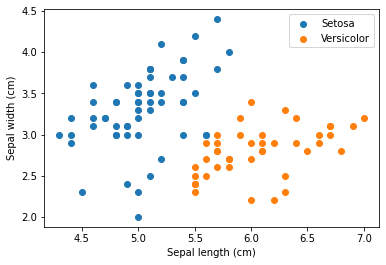

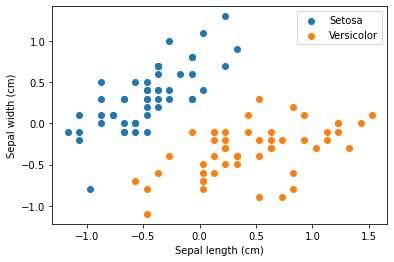

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math

iris = datasets.load_iris()
iris_data = iris.data

sl_data = iris_data[:100, 0]
sw_data = iris_data[:100, 1]

sl_ave = np.average(sl_data)
sl_data -= sl_ave
sw_ave = np.average(sw_data)
sw_data -= sw_ave

input_data = []
for i in range(100):
  input_data.append([sl_data[i], sw_data[i]])



#シグモイド関数
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

#ニューロン
class Neuron:
  def __init__(self):
    self.input_sum = 0.0
    self.output = 0.0

  def set_input(self, inp):
    self.input_sum += inp
    
  def get_output(self):
    self.output = sigmoid(self.input_sum)
    return self.output

  def reset(self):
    self.input_sum = 0
    self.output = 0

#ニューラルネットワーク
class NeuralNetwork:
   def __init__(self):
     self.neuron = Neuron()
     self.neuron2 = Neuron()
     self.w = [0.5, -0.2]
     self.bias = -0.1

   def commit(self, input_data):
     self.neuron.reset()

     self.neuron.set_input(input_data[0] * self.w[0])
     self.neuron.set_input(input_data[1] * self.w[1])
     self.neuron.set_input(self.bias)

     return self.neuron.get_output()

neural_network = NeuralNetwork()

st_predicted = [[],[]]
vc_predicted = [[],[]]
for data in input_data:
  if neural_network.commit(data) <0.5:
    st_predicted[0].append(data[0]+sl_ave)
    st_predicted[1].append(data[1]+sw_ave)
  else:
    vc_predicted[0].append(data[0]+sl_ave)
    vc_predicted[1].append(data[1]+sw_ave)

plt.scatter(st_predicted[0], st_predicted[1], label = "Setosa")
plt.scatter(vc_predicted[0], vc_predicted[1], label = "Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()



st_data = iris_data[:50]
vc_data = iris_data[50:100]
plt.scatter(st_data[:,0], st_data[:,1], label = "Setosa")
plt.scatter(vc_data[:,0], vc_data[:,1], label = "Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()
    

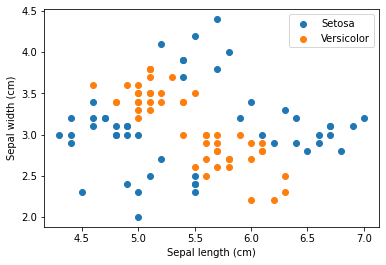

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math

iris = datasets.load_iris()
iris_data = iris.data

sl_data = iris_data[:100, 0]
sw_data = iris_data[:100, 1]

sl_ave = np.average(sl_data)
sl_data -= sl_ave
sw_ave = np.average(sw_data)
sw_data -= sw_ave

input_data = []
for i in range(100):
  input_data.append([sl_data[i], sw_data[i]])


#シグモイド関数
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

#ニューロン
class Neuron:
  def __init__(self):
    self.input_sum = 0.0
    self.output = 0.0

  def set_input(self, inp):
    self.input_sum += inp
    
  def get_output(self):
    self.output = sigmoid(self.input_sum)
    return self.output

  def reset(self):
    self.input_sum = 0
    self.output = 0
  

#ニューラルネットワーク
class NeuralNetwork:
   def __init__(self):

     self.w_im = [[4.0,4.0],[4.0,4.0]]
     self.w_mo = [[1.0, -1.0]]

     #バイアス
     self.b_m = [2.0, -2.0]
     self.b_o = [-0.5]

     #各層の宣言
     self.input_layer = [0.0, 0.0]
     self.middle_layer = [Neuron(), Neuron()]
     self.output_layer = [Neuron()]
     
   def commit(self, input_data):
     #各層のリセット
     self.input_layer[0] = input_data[0]
     self.input_layer[1] = input_data[1]
     self.middle_layer[0].reset()
     self.middle_layer[1].reset()
     self.output_layer[0].reset()

     #入力層→中間層
     self.middle_layer[0].set_input(self.input_layer[0] * self.w_im[0][0])
     self.middle_layer[0].set_input(self.input_layer[1] * self.w_im[0][1])
     self.middle_layer[0].set_input(self.b_m[0])

     self.middle_layer[1].set_input(self.input_layer[0] * self.w_im[1][0])
     self.middle_layer[1].set_input(self.input_layer[1] * self.w_im[1][1])
     self.middle_layer[1].set_input(self.b_m[1])

     #中間層→出力層
     self.output_layer[0].set_input(self.middle_layer[0].get_output() * self.w_mo[0][0])
     self.output_layer[0].set_input(self.middle_layer[1].get_output() * self.w_mo[0][1])
     self.output_layer[0].set_input(self.b_o[0])

     return self.output_layer[0].get_output()


neural_network = NeuralNetwork()

st_predicted = [[],[]]
vc_predicted = [[],[]]
for data in input_data:
  if neural_network.commit(data) <0.5:
    st_predicted[0].append(data[0]+sl_ave)
    st_predicted[1].append(data[1]+sw_ave)
  else:
    vc_predicted[0].append(data[0]+sl_ave)
    vc_predicted[1].append(data[1]+sw_ave)

plt.scatter(st_predicted[0], st_predicted[1], label = "Setosa")
plt.scatter(vc_predicted[0], vc_predicted[1], label = "Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()


     
 




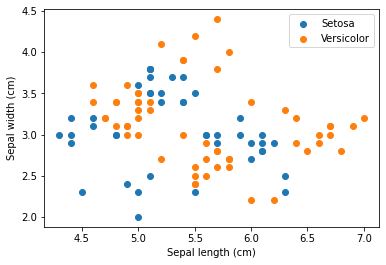

In [ ]:
#演習中間3出力1のニューラルネットワーク

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math

iris = datasets.load_iris()
iris_data = iris.data

sl_data = iris_data[:100, 0]
sw_data = iris_data[:100, 1]

sl_ave = np.average(sl_data)
sl_data -= sl_ave
sw_ave = np.average(sw_data)
sw_data -= sw_ave

input_data = []
for i in range(100):
  input_data.append([sl_data[i], sw_data[i]])


#シグモイド関数
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

#ニューロン
class Neuron:
  def __init__(self):
    self.input_sum = 0.0
    self.output = 0.0

  def set_input(self, inp):
    self.input_sum += inp
    
  def get_output(self):
    self.output = sigmoid(self.input_sum)
    return self.output

  def reset(self):
    self.input_sum = 0
    self.output = 0
  

#ニューラルネットワーク
class NeuralNetwork:
   def __init__(self):

     self.w_im = [[4.0,4.0],[4.0,4.0],[4.0,4.0]]
     self.w_mo = [[1.0, -1.0, 1.0]]

     #バイアス
     self.b_m = [3.0, 0.0, -3.0]
     self.b_o = [-0.5]

     #各層の宣言
     self.input_layer = [0.0, 0.0]
     self.middle_layer = [Neuron(), Neuron(), Neuron()]
     self.output_layer = [Neuron()]
     
   def commit(self, input_data):
     #各層のリセット
     self.input_layer[0] = input_data[0]
     self.input_layer[1] = input_data[1]
     self.middle_layer[0].reset()
     self.middle_layer[1].reset()
     self.middle_layer[2].reset()
     self.output_layer[0].reset()

     #入力層→中間層
     self.middle_layer[0].set_input(self.input_layer[0] * self.w_im[0][0])
     self.middle_layer[0].set_input(self.input_layer[1] * self.w_im[0][1])
     self.middle_layer[0].set_input(self.b_m[0])

     self.middle_layer[1].set_input(self.input_layer[0] * self.w_im[1][0])
     self.middle_layer[1].set_input(self.input_layer[1] * self.w_im[1][1])
     self.middle_layer[1].set_input(self.b_m[1])

     self.middle_layer[2].set_input(self.input_layer[0] * self.w_im[2][0])
     self.middle_layer[2].set_input(self.input_layer[1] * self.w_im[2][1])
     self.middle_layer[2].set_input(self.b_m[2])



     #中間層→出力層
     self.output_layer[0].set_input(self.middle_layer[0].get_output() * self.w_mo[0][0])
     self.output_layer[0].set_input(self.middle_layer[1].get_output() * self.w_mo[0][1])
     self.output_layer[0].set_input(self.middle_layer[2].get_output() * self.w_mo[0][2])
     self.output_layer[0].set_input(self.b_o[0])

     return self.output_layer[0].get_output()


neural_network = NeuralNetwork()

st_predicted = [[],[]]
vc_predicted = [[],[]]
for data in input_data:
  if neural_network.commit(data) <0.5:
    st_predicted[0].append(data[0]+sl_ave)
    st_predicted[1].append(data[1]+sw_ave)
  else:
    vc_predicted[0].append(data[0]+sl_ave)
    vc_predicted[1].append(data[1]+sw_ave)

plt.scatter(st_predicted[0], st_predicted[1], label = "Setosa")
plt.scatter(vc_predicted[0], vc_predicted[1], label = "Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()
